<a href="https://colab.research.google.com/github/HaifaAziz1/IT326-Mushroom-Project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget -O Preprocessed_dataset.csv "https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/main/Dataset/Preprocessed_dataset.csv"

import pandas as pd
df = pd.read_csv("Preprocessed_dataset.csv")
df.head(), df.shape


--2025-11-19 09:49:18--  https://raw.githubusercontent.com/HaifaAziz1/IT326-Mushroom-Project/main/Dataset/Preprocessed_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1317333 (1.3M) [text/plain]
Saving to: ‘Preprocessed_dataset.csv’

Preprocessed_datase 100%[===================>]   1.26M  6.98MB/s    in 0.2s    

2025-11-19 09:49:18 (6.98 MB/s) - ‘Preprocessed_dataset.csv’ saved [1317333/1317333]



(   class  odor_n  odor_f  stalk-surface-above-ring_k  \
 0      1       0       0                           0   
 1      0       0       0                           0   
 2      0       0       0                           0   
 3      1       0       0                           0   
 4      0       1       0                           0   
 
    stalk-surface-below-ring_k  gill-color_b  ring-type_p  spore-print-color_n  \
 0                           0             0            1                    0   
 1                           0             0            1                    1   
 2                           0             0            1                    1   
 3                           0             0            1                    0   
 4                           0             0            0                    1   
 
    spore-print-color_k  gill-spacing_w  ...  cap-color_Other  cap-shape_Other  \
 0                    1               0  ...                0                0  

This code loads the preprocessed dataset and displays the first few rows to ensure it was imported correctly.


In [4]:
# فصل عمود الكلاس عن باقي الأعمدة (الكلسترنق ما يستخدمه)
X_clust = df.drop('class', axis=1)

X_clust.shape


(8124, 80)

We removed the class label because clustering is an unsupervised task.
The variable X_clust now contains only the features used for K-means clustering.


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = [2, 3, 4]
cluster_results = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clust)

    sil = silhouette_score(X_clust, labels)
    wcss = kmeans.inertia_

    cluster_results.append({
        "K": k,
        "Silhouette": sil,
        "WCSS": wcss
    })

    print(f"K={k}, Silhouette={sil:.4f}, WCSS={wcss:.2f}")


K=2, Silhouette=0.1400, WCSS=56795.34
K=3, Silhouette=0.1568, WCSS=51007.55
K=4, Silhouette=0.1868, WCSS=45276.23


We applied K-means clustering with three different values of K (2, 3, and 4).
For each K, we calculated the Silhouette score and WCSS to evaluate cluster quality and separation.


In [6]:
import pandas as pd

cluster_df = pd.DataFrame(cluster_results)
cluster_df


,K,Silhouette,WCSS
0,2,0.140017,56795.340659
1,3,0.156803,51007.546667
2,4,0.186792,45276.229345


This table summarizes the clustering results for each K value and allows easy comparison between Silhouette scores and WCSS.


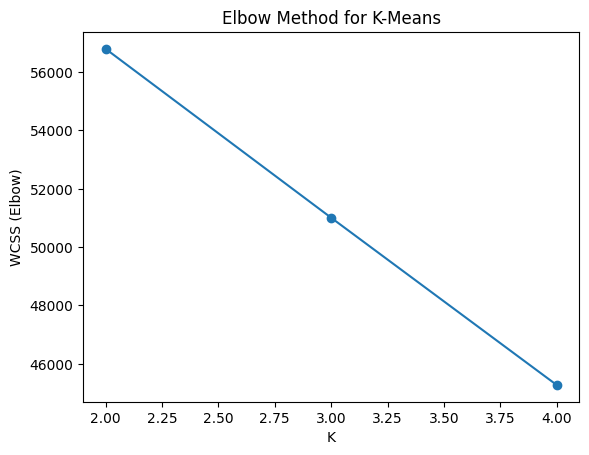

In [7]:
import matplotlib.pyplot as plt

plt.plot(cluster_df["K"], cluster_df["WCSS"], marker='o')
plt.xlabel("K")
plt.ylabel("WCSS (Elbow)")
plt.title("Elbow Method for K-Means")
plt.show()


The Elbow plot visualizes how WCSS decreases as K increases.
In this dataset, the curve does not show a clear elbow point, so WCSS alone is not enough to choose the best K.


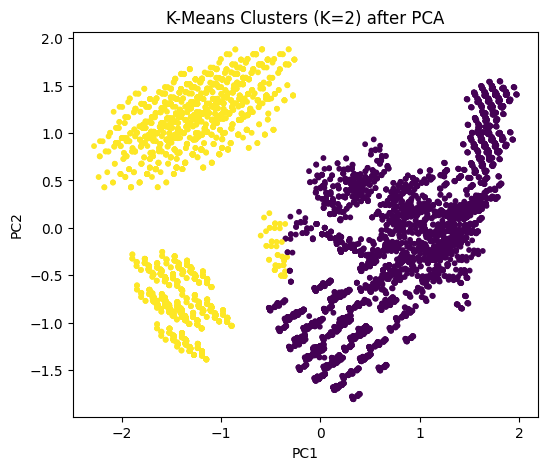

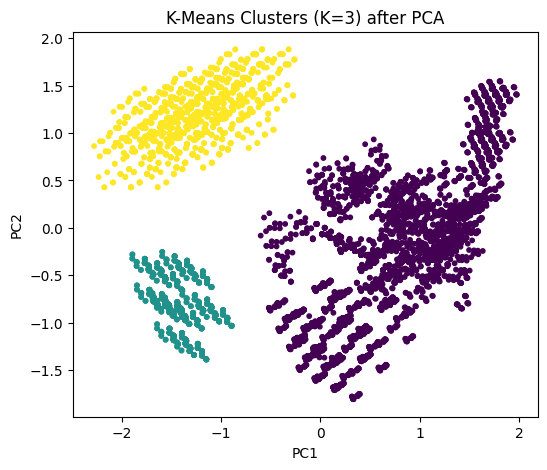

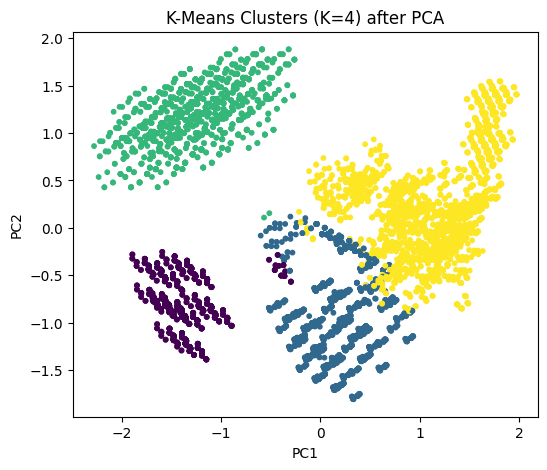

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# تقليل الأبعاد إلى 2D لرسم الكلسترز
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust)

# رسم الكلسترز لكل قيمة من K (2، 3، 4)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_clust)

    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"K-Means Clusters (K={k}) after PCA")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()


PCA was used to reduce the dataset to two dimensions for visualization.
These plots show how the data points are grouped for each K value and help interpret the clustering structure.
